# Project: The Diseases DataBase (TDDB) Project

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

***
We will collect data about various diseases and this data consists of (disease name, symptoms, risk factors, causes, diagnosis, etc...) and this data we will collect by scraping a website (https://www.mayoclinic.org/) in ( Diseases_master.csv )then we will display data and discover quality and narrow issues and then we clean that data and answer the listed questions.

- What are the top 10 symptoms that accompany most diseases?
- What are the top 10 risk factors associated with most diseases?

***

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import urllib3
from tqdm import tqdm
from http.client import responses
from bs4 import BeautifulSoup as BS
from tqdm import tqdm
import matplotlib.pyplot as plt  
import seaborn
%matplotlib inline

<a id='collection'></a>
# Data Collection using web scraping

### We will do the following steps:
-  We will specify the site from which we will scrape data, which is ( https://www.mayoclinic.org/ )
-  Then we will specify the sentences and points that we want to scrape
-  Finally, we will fill in the data base with this data ( DiseasesDB.csv , Diseases_master.csv) 

In [2]:
http = urllib3.PoolManager()
#Until we can extract only the sentences we need
list_header = ['h1','h2','h3','h4','h5','h6','h7']
list_a = ['a','div']

#WE will create some of arraylist to store texts
arraylist_for_alphaptic = []
arraylist_for_diseases = []
arraylist_urls_symptoms_treatment = []
arraylist_all_data = []
arraylist_all_data_subset = []

In [4]:
#Path of files
path = 'C:\\Users\\hossam\\Desktop\\'
output_file_final = os.path.join(path,'DiseasesDB.csv')

#url of data extraction
url = "https://www.mayoclinic.org/diseases-conditions/index?letter=A"

## We will do the following steps: 

- we will fill arraylist_for_alphaptic use the above url

In [5]:
while True:
    response = http.request('GET', url,headers={'User-Agent': 'Mozilla/5.0'})
    http_status_description = responses[response.status]
    print("inside :  ",response.status , " --  ",http_status_description )
    if responses[response.status] == "OK" and response.status == 200:
        break
print("finish :  ",response.status , " --  ",http_status_description )    
soup = BS(response.data,'html.parser')
target = soup.find('div', class_ ='holder')
try:
    newsoup = BS(str(target), 'html.parser')
    lis = newsoup.find_all('li')
    for li in lis:
        arraylist_for_alphaptic.append("https://www.mayoclinic.org"+li.find('a')['href'])
        # print("https://www.mayoclinic.org"+li.find('a')['href'])
except Exception:
    text = "not found urls"

inside :   200  --   OK
finish :   200  --   OK


- Then we dictate arraylist_for_diseases by extracting the links in arraylist_for_alphaptic and placing them in arraylist_for_diseases

In [6]:
for url_alphaptic in tqdm(arraylist_for_alphaptic):
    url = url_alphaptic
    
    while True:
        response = http.request('GET', url,headers={'User-Agent': 'Mozilla/5.0'})
        http_status_description = responses[response.status]
        #print("inside :  ",response.status , " --  ",http_status_description )
        if responses[response.status] == "OK" and response.status == 200:
            break
    #print("finish :  ",response.status , " --  ",http_status_description )   
    
    soup = BS(response.data,'html.parser')
    target = soup.find('div', class_ ='index content-within')
    try:
        newsoup = BS(str(target), 'html.parser')
        lis = newsoup.find_all('li')
        for li in lis:
            arraylist_for_diseases.append("https://www.mayoclinic.org"+li.find('a')['href'])
              #  print("https://www.mayoclinic.org"+li.find('a')['href'])
    except Exception:
        text = "not found urls"
        
print(len(arraylist_for_diseases))

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:27<00:00,  1.01s/it]

2206


- After these operations, we can now access each link for each disease separately and take the data that we want to scrape, but before that we must extract the links ( Treatment , Diagnosis , Medications ).

##### So we will do some operations, which are as follows:
- We do a arraylist scan ( arraylist_for_diseases ).
- Then we create a dictionary ( dictionary_urls_symptoms_treatment)  and put link of ( url_symptoms_causes ) in the key
- ( url_symptoms_causes ) and put link ( url_diagnosis_treatment ) in the key ( url_diagnosis_treatment ).
- Finally, we add that dictionary to ( arraylist_urls_symptoms_treatment )and repeat these operations until we finish scanning the arraylist ( arraylist_for_diseases ).

In [7]:
for url_diseases in tqdm(arraylist_for_diseases):
    dictionary_urls_symptoms_treatment = {}
    url = url_diseases
    while True:
        response = http.request('GET', url,headers={'User-Agent': 'Mozilla/5.0'})
        http_status_description = responses[response.status]
        #print("inside :  ",response.status , " --  ",http_status_description )
        if responses[response.status] == "OK" and response.status == 200:
            break
    #print("finish :  ",response.status , " --  ",http_status_description )   
    soup = BS(response.data,'html.parser')
    target = soup.find('div',id ='access-nav')
    
    try:
        newsoup = BS(str(target), 'html.parser')
        lis = newsoup.find_all('li')
        count = 0
        for li in lis:
            if count == 0:
                dictionary_urls_symptoms_treatment['url_symptoms_causes'] = "https://www.mayoclinic.org"+li.find('a')['href']
            elif count ==1:
                dictionary_urls_symptoms_treatment['url_diagnosis_treatment'] = "https://www.mayoclinic.org"+li.find('a')['href']
            else:
                break
            count+=1
        if  dictionary_urls_symptoms_treatment != {}:
            arraylist_urls_symptoms_treatment.append(dictionary_urls_symptoms_treatment)
    except Exception:
        text = "not found urls"

print(len(arraylist_urls_symptoms_treatment))

100%|██████████████████████████████████████████████████████████████████████████████| 2206/2206 [16:25<00:00,  2.24it/s]

2206


###### Now we have a link for each disease (url_diagnosis_treatment,url_symptoms_causes ) 

- We do a arraylist scan ( arraylist_urls_symptoms_treatment ).

- Then we create a dictionary ( dictionary_all_data ) and put some data in it: 

  - url_of_disease (symptoms-causes)          
  - name of symptoms-causes                   
  - Overview                                  
  - pragraph of Symptoms                      
  - Symptoms                                 
  - When to see a doctor                      
  - pragraph of Causes                        
  - Causes                                   
  - pragraph of Risk factors               
  - Risk factors                            
  - pragraph of Complications                 
  - Complications                         
  - pragraph of Prevention                    
  - Prevention                              
  - url_of_disease (diagnosis-treatment)      
  - name of (diagnosis-treatment)            
  - pragraph of Diagnosis                  
  - Diagnosis                                
  - pragraph of Treatment                    
  - Treatment                              
  - pragraph of Medications                   
  - Medications                          




- Finally, we add that dictionary to ( arraylist_all_data )and repeat these operations until we finish scanning the arraylist ( arraylist_urls_symptoms_treatment ).

###### note we will this operation with dictionary(dictionary_all_data_subset ) and append to arraylist ( arraylist_all_data_subset ).

In [17]:
count = 1
arraylist_all_data_subset=[]
dictionary_all_data_subset={}
    
for dictionary_url in tqdm(arraylist_urls_symptoms_treatment) : 
    dictionary_all_data = {}
    url_symptoms_causes = dictionary_url['url_symptoms_causes']
    url_diagnosis_treatment = dictionary_url['url_diagnosis_treatment']
    
    
    ##############################################################
    ##############################################################
    #to get infromation about symptoms-causes for each disease####
    ##############################################################
    ##############################################################
    #url_symptoms_causes = "https://www.mayoclinic.org/diseases-conditions/coronavirus/symptoms-causes/syc-20479963"
    
    while True:
        response = http.request('GET', url_symptoms_causes,headers={'User-Agent': 'Mozilla/5.0'})
        http_status_description = responses[response.status]
        #print("inside :  ",response.status , " --  ",http_status_description )
        if responses[response.status] == "OK" and response.status == 200:
            break
    #print("finish :  ",response.status , " --  ",http_status_description )
    
    soup = BS(response.data,'html.parser')
    dictionary_all_data['url_of_disease (symptoms-causes)'] = url_symptoms_causes
    
    ####for extract name of disease 
    target = soup.find('h1').text
    #print(target)
    dictionary_all_data['name of symptoms-causes'] = target
    
    ####for extract Overview 
    flag = False
    text = ''
    #print("\n\Overview : \n")
    target = soup.find('h2',text='Overview')
    try:
        for sib in target.find_next_siblings():
            if sib.name in list_header :
                break
            else:
                newsoup = BS(str(sib), 'html.parser')
                lis = newsoup.find_all('p')
                for li in lis:
                    text = text + li.text + "@$"
                #     print(li.text)
    except Exception:
        text = "not found Overview"
        # print("not found Overview")
    dictionary_all_data['Overview'] = text
    
    ####for extract pragraph of Symptoms 
    #print("\n\ pragraph of Symptoms  : \n")
    flag = False
    text = ''
    target = soup.find('h2',text='Symptoms')
    try:
        for sib in target.find_next_siblings():
                if (sib.name in list_header or sib.name in list_a ) and flag :
                    break
                else:
                    newsoup = BS(str(sib), 'html.parser')
                    lis = "".join([p.text for p in newsoup.find_all("p")])
                    text = text + str(lis) + "@$"
                    lis = newsoup.find_all('li')
                    for li in lis:
                        text = text + li.text + "@$"
                        flag = True
    except Exception:
        text = "not found Symptoms"
      #  print("not found Symptoms")
    dictionary_all_data['pragraph of Symptoms'] = text
    
    ####for extract Symptoms 
    #print("\n\nSymptoms : \n")
    flag = False
    text = ''
    target = soup.find('h2',text='Symptoms')
    try:
        for sib in target.find_next_siblings():
            if (sib.name in list_header or sib.name in list_a ) and flag :
                break
            else:
                newsoup = BS(str(sib), 'html.parser')
                lis = newsoup.find_all('li')
                for li in lis:
                    text = text + li.text + "@$"
                    flag = True
    except Exception:
        text = "not found Symptoms"
      #  print("not found Symptoms")
    dictionary_all_data['Symptoms'] = text
                
    ####for extract when to see doctor 
    #print("\n\nwhen to see doctor  : \n")
    flag = False
    text = ''
    target = soup.find('h3',text='When to see a doctor')
    try:
        for sib in target.find_next_siblings():
            if sib.name=="div":
                break
            else:
                text = text + sib.text + "@$"
                # print(sib.text)
    except Exception:
        text = "not found When to see a doctor"
        # print("not found When to see a doctor")
    dictionary_all_data['When to see a doctor'] = text
    
    ####for extract pragraph of Causes correct
    #print("\n\npragraph of Causes  : \n")
    flag = False
    text =''
    target = soup.find('h2',text='Causes')
    try:
        for sib in target.find_next_siblings():
                if (sib.name in list_header or sib.name in list_a ) and flag :
                    break
                else:
                    newsoup = BS(str(sib), 'html.parser')
                    lis = "".join([p.text for p in newsoup.find_all("p")])
                    text = text + str(lis) + "@$"
                    lis = newsoup.find_all('li')
                    for li in lis:
                        text = text + li.text + "@$"
                        flag = True
    except Exception:
        text = "not found Causes"
      #  print("not found Causes")
    dictionary_all_data['pragraph of Causes'] = text
        
    ####for extract Causes correct
    #print("\n\nCauses  : \n")
    flag = False
    text = ''
    target = soup.find('h2',text='Causes')
    try:
        for sib in target.find_next_siblings():
            if (sib.name in list_header or sib.name in list_a ) and flag :
                break
            else:
                newsoup = BS(str(sib), 'html.parser')
                lis = newsoup.find_all('li')
                for li in lis:
                    text = text + li.text + "@$"
                    flag = True
    except Exception:
        text = "not found Causes"
        # print("not found Causes")
    dictionary_all_data['Causes'] =text   
    
    ####for extract pragraph of Risk factors correct
    #print("\n\npragraph of Risk factors   : \n")
    flag = False
    text = ''
    target = soup.find('h2',text='Risk factors')
    try:
        for sib in target.find_next_siblings():
                if (sib.name in list_header or sib.name in list_a ) and flag :
                    break
                else:
                    newsoup = BS(str(sib), 'html.parser')
                    lis = "".join([p.text for p in newsoup.find_all("p")])
                    text = text + str(lis) + "@$"
                    lis = newsoup.find_all('li')
                    for li in lis:
                        text = text + li.text + "@$"
                        flag = True
    except Exception:
        text = "not found Risk factors"
      #  print("not found Risk factors")      
    dictionary_all_data['pragraph of Risk factors'] =text 
    
    ####or extract Risk factors correct
    # print("\n\n Risk factors   : \n")
    flag = False
    text = ''
    target = soup.find('h2',text='Risk factors')
    try:
        for sib in target.find_next_siblings():
            if (sib.name in list_header or sib.name in list_a ) and flag :
                break
            else:
                newsoup = BS(str(sib), 'html.parser')
                lis = newsoup.find_all('li')
                for li in lis:
                    text = text + li.text + "@$"
                    flag = True
    except Exception:
        text = "not found Risk factors"
        # print("not found Risk factors")     
    dictionary_all_data['Risk factors'] =text  
    
    ####for extract pragraph of Complications  correct
    #print("\n\n pragraph of Complications   : \n")
    flag = False
    text = ""
    target = soup.find('h2',text='Complications')
    try:
        for sib in target.find_next_siblings():
                if (sib.name in list_header or sib.name in list_a ) and flag :
                    break
                else:
                    newsoup = BS(str(sib), 'html.parser')
                    lis = "".join([p.text for p in newsoup.find_all("p")])
                    text = text + str(lis) + "@$"
                    lis = newsoup.find_all('li')
                    for li in lis:
                        text = text + li.text + "@$"
                        flag = True
    except Exception:
        text = "not found Complications"
        # print("not found Complications")
    dictionary_all_data['pragraph of Complications'] =text   
            
    ####for extract Complications  correct
    #print("\n\n Complications   : \n")
    flag = False
    text = ""
    target = soup.find('h2',text='Complications')
    try:
        for sib in target.find_next_siblings():
            if (sib.name in list_header or sib.name in list_a ) and flag :
                break
            else:
                newsoup = BS(str(sib), 'html.parser')
                lis = newsoup.find_all('li')
                for li in lis:
                    text = text + li.text + "@$"
                    flag = True
    except Exception:
        text = "not found Complications"
      #  print("not found Complications")
    dictionary_all_data['Complications'] =text     
          
    ####for extract pragraph of Prevention  correct
    #print("\n\n  pragraph of Prevention   : \n")
    flag = False
    text = ""
    target = soup.find('h2',text='Prevention')
    try:
        for sib in target.find_next_siblings():
                if (sib.name in list_header or sib.name in list_a ) and flag :
                    break
                else:
                    newsoup = BS(str(sib), 'html.parser')
                    lis = "".join([p.text for p in newsoup.find_all("p")])
                    text = text + str(lis) + "@$"
                    lis = newsoup.find_all('li')
                    for li in lis:
                        text = text + li.text + "@$"
                        flag = True
    except Exception:
        text = "not found Prevention"
      #  print("not found Prevention")
    dictionary_all_data['pragraph of Prevention'] = text
    
    ####for extract Prevention  correct
    #print("\n\n Prevention   : \n")
    flag = False
    text = ""
    target = soup.find('h2',text='Prevention')
    try:
        for sib in target.find_next_siblings():
            if (sib.name in list_header or sib.name in list_a ) and flag :
                break
            else:
                newsoup = BS(str(sib), 'html.parser')
                lis = newsoup.find_all('li')
                for li in lis:
                    text = text + li.text + "@$"
                    flag = True
    except Exception:
        text = "not found Prevention"
        # print("not found Prevention")
    dictionary_all_data['Prevention'] = text 
    
    ###############################################################
    ###############################################################
    #to get infromation about diagnosis-treatment for each disease#
    ###############################################################
    ###############################################################

    #url_diagnosis_treatment = "https://www.mayoclinic.org/diseases-conditions/coronavirus/diagnosis-treatment/drc-20479976"
    
    while True:
        response = http.request('GET', url_diagnosis_treatment,headers={'User-Agent': 'Mozilla/5.0'})
        http_status_description = responses[response.status]
        #print("inside :  ",response.status , " --  ",http_status_description )
        if responses[response.status] == "OK" and response.status == 200:
            break
    #print("finish :  ",response.status , " --  ",http_status_description )
    soup = BS(response.data,'html.parser')
    dictionary_all_data['url_of_disease (diagnosis-treatment)'] = url_diagnosis_treatment
    
    ####for extract name of disease 
    target = soup.find('h1').text
    #print(target)
    dictionary_all_data['name of (diagnosis-treatment)'] = target
    
    ####for extract pragraph of Diagnosis 
    # print("\n\n pragraph of Diagnosis : \n")
    flag = False
    text = ""
    target = soup.find('h2',text='Diagnosis')
    try:
        for sib in target.find_next_siblings():
                if (sib.name in list_header or sib.name in list_a ) and flag :
                    break
                else:
                    newsoup = BS(str(sib), 'html.parser')
                    lis = "".join([p.text for p in newsoup.find_all("p")])
                    text = text + str(lis) + "@$"
                    lis = newsoup.find_all('li')
                    for li in lis:
                        text = text + li.text + "@$"
                        flag = True
    except Exception:
        text = "not found Diagnosis"
      #  print("not found Diagnosis")
    dictionary_all_data['pragraph of Diagnosis'] = text
        
    ####for extract Diagnosis 
    #
    #print("\n\n Diagnosis : \n")
    flag = False
    text = ""
    target = soup.find('h2',text='Diagnosis')
    try:
        for sib in target.find_next_siblings():
            if (sib.name in list_header or sib.name in list_a ) and flag :
                break
            else:
                newsoup = BS(str(sib), 'html.parser')
                lis = newsoup.find_all('li')
                for li in lis:
                    text = text + li.text + "@$"
                    flag = True
    except Exception:
        text = "not found Diagnosis"
        # print("not found Diagnosis")
    dictionary_all_data['Diagnosis'] = text
    
    ####for extract pragraph of Treatment  correct
    #print("\n\n pragraph of Treatment   : \n")
    flag = False
    text = ""
    target = soup.find('h2',text='Treatment')
    try:
        for sib in target.find_next_siblings():
                if (sib.name in list_header or sib.name in list_a ) and flag :
                    break
                else:
                    newsoup = BS(str(sib), 'html.parser')
                    lis = "".join([p.text for p in newsoup.find_all("p")])
                    text = text + str(lis) + "@$"
                    lis = newsoup.find_all('li')
                    for li in lis:
                        text = text + li.text + "@$"
                        flag = True
    except Exception:
        text = "not found Treatment"
      #  print("not found Treatment")
    dictionary_all_data['pragraph of Treatment'] = text
    
    ####for extract Treatment  correct
    #print("\n\n Treatment   : \n")
    flag = False
    text = ""
    target = soup.find('h2',text='Treatment')
    try:
      for sib in target.find_next_siblings():
            if (sib.name in list_header or sib.name in list_a ) and flag :
                break
            else:
                newsoup = BS(str(sib), 'html.parser')
                lis = newsoup.find_all('li')
                for li in lis:
                    text = text + li.text + "@$"
                    flag = True
    except Exception:
        text = "not found Treatment"
        # print("not found Treatment")
    dictionary_all_data['Treatment'] = text
    
    ####for extract pragraph of Medications correct
    #print("\n\n Medications   : \n")
    flag = False
    text = ""
    target = soup.find('h3',text='Medications')
    try:
        for sib in target.find_next_siblings():
                if (sib.name in list_header or sib.name in list_a ) and flag :
                    break
                else:
                    newsoup = BS(str(sib), 'html.parser')
                    lis = "".join([p.text for p in newsoup.find_all("p")])
                    text = text + str(lis) + "@$"
                    lis = newsoup.find_all('li')
                    for li in lis:
                        text = text + li.text + "@$"
                        flag = True
    except Exception:
        text = "not found Medications"
        # print("not found Medications")
    dictionary_all_data['pragraph of Medications'] = text
    
    
    ####for extract Medications  correct
    #print("\n\n Medications   : \n")
    flag = False
    text = ""
    target = soup.find('h3',text='Medications')
    try:
        for sib in target.find_next_siblings():
            if (sib.name in list_header or sib.name in list_a ) and flag :
                break
            else:
                newsoup = BS(str(sib), 'html.parser')
                lis = newsoup.find_all('li')
                for li in lis:
                    text = text + li.text + "@$"
                    flag = True
    except Exception:
        text = "not found Medications"
        # print("not found Medications")
    dictionary_all_data['Medications'] = text
    if  dictionary_all_data != {} and dictionary_all_data not in arraylist_all_data:
        arraylist_all_data.append(dictionary_all_data)
        arraylist_all_data_subset.append(dictionary_all_data_subset)
        #print(count)
        count+=1

100%|██████████████████████████████████████████████████████████████████████████████| 2206/2206 [33:21<00:00,  1.10it/s]


##### Finally we will pass ( arraylist_all_data ) to pd.DataFrame and convert it to a file output_file_final.csv .
##### And  we will pass ( arraylist_all_data_subset ) to pd.DataFrame and convert it to a file output_file_SubSet.csv .

In [14]:
df = pd.DataFrame(arraylist_all_data)
df.to_csv(output_file_final, index=False)
print("finish of Final DataSet --> " , len(arraylist_all_data))
    
df = pd.DataFrame(arraylist_all_data_subset)
df.to_csv(output_file_SubSet, index=False)
print("finish of SubSet DataSet --> " , len(arraylist_all_data_subset))

finish of Final DataSet -->  1150
finish of SubSet DataSet -->  1150


### Now we can view and deal with data

<a id='wrangling'></a>
# Data Wrangling

### General Properties

#### Gathering Data

In [85]:
# GATHER DATA FROM tmdb-movies
df_diseases = pd.read_csv("DiseasesDB.csv")

#### View data

In [86]:
df_diseases.head()

,url_of_disease (symptoms-causes),name of symptoms-causes,Overview,pragraph of Symptoms,Symptoms,When to see a doctor,pragraph of Causes,Causes,pragraph of Risk factors,Risk factors,...,pragraph of Prevention,Prevention,url_of_disease (diagnosis-treatment),name of (diagnosis-treatment),pragraph of Diagnosis,Diagnosis,pragraph of Treatment,Treatment,pragraph of Medications,Medications
0,https://www.mayoclinic.org/diseases-conditions...,Atrial fibrillation,"In a typical heart rhythm, a tiny cluster of c...",Some people with atrial fibrillation (A-fib) d...,"Sensations of a fast, fluttering or pounding h...",If you have any signs or symptoms of atrial fi...,"To understand the causes of A-fib, it may be h...",The signal travels from the sinus node through...,Things that can increase the risk of atrial fi...,"Age. The older a person is, the greater the ri...",...,Healthy lifestyle choices can reduce the risk ...,Eat a nutritious diet@$Get regular exercise an...,https://www.mayoclinic.org/diseases-conditions...,Atrial fibrillation,Some people are unaware that they have atrial ...,Electrocardiogram (ECG or EKG). This quick and...,Treatment for atrial fibrillation depends on h...,Reset the heart rhythm@$Control the heart rate...,You may be prescribed medications to control h...,Beta blockers. These medications can help slow...
1,https://www.mayoclinic.org/diseases-conditions...,Abdominal aortic aneurysm,An abdominal aortic aneurysm occurs when a low...,Abdominal aortic aneurysms often grow slowly w...,"Deep, constant pain in the belly area or side ...","If you have pain, especially if pain is sudden...",Aneurysms can develop anywhere along the aorta...,Hardening of the arteries (atherosclerosis). A...,Abdominal aortic aneurysm risk factors include...,Tobacco use. Smoking is the strongest risk fac...,...,To prevent an aortic aneurysm or keep an aorti...,Don't smoke or use tobacco products. Quit smok...,https://www.mayoclinic.org/diseases-conditions...,Abdominal aortic aneurysm,Abdominal aortic aneurysms are often found whe...,\nAbdominal ultrasound. This is the most commo...,The goal of abdominal aortic aneurysm treatmen...,\nEndovascular repair. This procedure is used ...,not found Medications,not found Medications
2,https://www.mayoclinic.org/diseases-conditions...,Hyperhidrosis,Hyperhidrosis (hi-pur-hi-DROE-sis) is abnormal...,Most people sweat when they exercise or exert ...,Sweating disrupts your daily routine@$Sweating...,not found When to see a doctor,Your skin has two types of sweat glands: eccri...,Diabetes@$Menopause hot flashes@$Thyroid probl...,not found Risk factors,not found Risk factors,...,not found Prevention,not found Prevention,https://www.mayoclinic.org/diseases-conditions...,Hyperhidrosis,"During your appointment, your doctor will ask ...",Prescription antiperspirant. Your doctor may p...,If an underlying medical condition is contribu...,Prescription antiperspirant. Your doctor may p...,Drugs used to treat hyperhidrosis include:@$@$...,Prescription antiperspirant. Your doctor may p...
3,https://www.mayoclinic.org/diseases-conditions...,Bartholin's cyst,The Bartholin's glands are located on each sid...,"If you have a small, noninfected Bartholin's c...","A tender, painful lump near the vaginal openin...",Call your doctor if you have a painful lump ne...,Experts believe that the cause of a Bartholin'...,NaN,not found Risk factors,not found Risk factors,...,There's no way to prevent a Bartholin's cyst. ...,NaN,https://www.mayoclinic.org/diseases-conditions...,Bartholin's cyst,"To diagnose a Bartholin's cyst, your doctor ma...",Ask questions about your medical history@$Perf...,Often a Bartholin's cyst requires no treatment...,Sitz baths. Soaking in a tub filled with a few...,not found Medications,not found Medications
4,https://www.mayoclinic.org/diseases-conditions...,Absence seizure,"Absence seizures involve brief, sudden lapses ...",An indication of simple absence seizure is a v...,Sudden stop in motion without fall

#### View information of data

In [87]:
df_diseases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   url_of_disease (symptoms-causes)      1150 non-null   object
 1   name of symptoms-causes               1150 non-null   object
 2   Overview                              1150 non-null   object
 3   pragraph of Symptoms                  1150 non-null   object
 4   Symptoms                              1134 non-null   object
 5   When to see a doctor                  1149 non-null   object
 6   pragraph of Causes                    1150 non-null   object
 7   Causes                                1089 non-null   object
 8   pragraph of Risk factors              1150 non-null   object
 9   Risk factors                          1108 non-null   object
 10  pragraph of Complications             1150 non-null   object
 11  Complications                 

#### View missing data

In [88]:
df_diseases.isnull().sum()

url_of_disease (symptoms-causes)          0
name of symptoms-causes                   0
Overview                                  0
pragraph of Symptoms                      0
Symptoms                                 16
When to see a doctor                      1
pragraph of Causes                        0
Causes                                   61
pragraph of Risk factors                  0
Risk factors                             42
pragraph of Complications                 0
Complications                           127
pragraph of Prevention                    0
Prevention                              142
url_of_disease (diagnosis-treatment)      0
name of (diagnosis-treatment)             0
pragraph of Diagnosis                     0
Diagnosis                                 7
pragraph of Treatment                     0
Treatment                                22
pragraph of Medications                   0
Medications                               2
dtype: int64

View missing data with ( 'not found' + name of column )

In [89]:
print("\n\n if not found : \n ")
print("Symptoms : ",len(df_diseases[df_diseases["Symptoms"] == "not found Symptoms"]))
print("When to see a doctor : ",len(df_diseases[df_diseases["When to see a doctor"] == "not found When to see a doctor"]))
print("Causes : ",len(df_diseases[df_diseases["Causes"] == "not found Causes"]))
print("Risk factors : ",len(df_diseases[df_diseases["Risk factors"] == "not found Risk factors"]))
print("Complications : ",len(df_diseases[df_diseases["Complications"] == "not found Complications"]))
print("Prevention : ",len(df_diseases[df_diseases["Prevention"] == "not found Prevention"]))
print("Diagnosis : ",len(df_diseases[df_diseases["Diagnosis"] == "not found Diagnosis"]))
print("Medications : ",len(df_diseases[df_diseases["Medications"] == "not found Medications"]))
print("Treatment : ",len(df_diseases[df_diseases["Treatment"] == "not found Treatment"]))

print("Overview : ",len(df_diseases[df_diseases["Overview"] == "not found Overview"]))
print("pragraph of Symptoms : ",len(df_diseases[df_diseases["pragraph of Symptoms"] == "not found Symptoms"]))
print("pragraph of Causes : ",len(df_diseases[df_diseases["pragraph of Causes"] == "not found Causes"]))
print("pragraph of Risk factors : ",len(df_diseases[df_diseases["pragraph of Risk factors"] == "not found Risk factors"]))
print("pragraph of Complications : ",len(df_diseases[df_diseases["pragraph of Complications"]  == "not found Complications"]))
print("pragraph of Prevention : ",len(df_diseases[df_diseases["pragraph of Prevention"] == "not found Prevention"]))
print("pragraph of Diagnosis : ",len(df_diseases[df_diseases["pragraph of Diagnosis"] == "not found Diagnosis"]))
print("pragraph of Medications : ",len(df_diseases[df_diseases["pragraph of Medications"] == "not found Medications"]))
print("pragraph of Treatment : ",len(df_diseases[df_diseases["pragraph of Treatment"] == "not found Treatment"]))



 if not found : 
 
Symptoms :  38
When to see a doctor :  240
Causes :  46
Risk factors :  214
Complications :  275
Prevention :  539
Diagnosis :  46
Medications :  852
Treatment :  30
Overview :  0
pragraph of Symptoms :  38
pragraph of Causes :  46
pragraph of Risk factors :  214
pragraph of Complications :  275
pragraph of Prevention :  539
pragraph of Diagnosis :  46
pragraph of Medications :  852
pragraph of Treatment :  30


#### View duplicated data

In [90]:
sum(df_diseases.duplicated())

0

## Assess Data

### QUALTIY DIMENSIONS
-  missing values ( nan ) in (Symptoms, When to see a doctor , Causes, Risk factors , Treatment , Diagnosis )
-  missing values ( not found ) in (Symptoms, Causes ,  Diagnosis , Treatment )
-  missing values ( not found ) in ( pragraph of Symptoms , pragraph of Causes , pragraph of Risk factors , pragraph of Diagnosis, pragraph of Treatment )
 

### Tidiness
- Drop column ( Complications , Prevention, pragraph of Complications, pragraph of Prevention , Medications , pragraph of Medications )


### Data Cleaning 

## Cleaning Of Data

In [91]:
#Copy of Data
df_diseases_clean = df_diseases.copy()

Define

#####  Drop column ( Complications , Prevention, pragraph of Complications, pragraph of Prevention , Medications , pragraph of Medications )

Code

In [92]:
df_diseases_clean.drop(columns=['Complications' , 'Prevention', 'Medications', 'pragraph of Complications',
                                'pragraph of Prevention'  , 'pragraph of Medications']
                               , axis=1, inplace=True)

Test

In [93]:
df_diseases_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   url_of_disease (symptoms-causes)      1150 non-null   object
 1   name of symptoms-causes               1150 non-null   object
 2   Overview                              1150 non-null   object
 3   pragraph of Symptoms                  1150 non-null   object
 4   Symptoms                              1134 non-null   object
 5   When to see a doctor                  1149 non-null   object
 6   pragraph of Causes                    1150 non-null   object
 7   Causes                                1089 non-null   object
 8   pragraph of Risk factors              1150 non-null   object
 9   Risk factors                          1108 non-null   object
 10  url_of_disease (diagnosis-treatment)  1150 non-null   object
 11  name of (diagnosis-treatment) 

Define

#### Fixing columns that contain of nan values
     ( Symptoms, When to see a doctor , Causes, Risk factors , Treatment , Diagnosis )
 
      Fill nan value in columns by ( 'not found of' + name of column )

Code

In [94]:
df_diseases_clean['Symptoms'].fillna('not found Symptoms',inplace = True)
df_diseases_clean['When to see a doctor'].fillna('not found When to see a doctor',inplace = True)
df_diseases_clean['Causes'].fillna('not found Causes',inplace = True)
df_diseases_clean['Risk factors'].fillna('not found Risk factors',inplace = True)
df_diseases_clean['Treatment'].fillna('not found Treatment',inplace = True)
df_diseases_clean['Diagnosis'].fillna('not found Diagnosis',inplace = True)

Test

To show missing values in data set

In [95]:
df_diseases_clean.isnull().sum()

url_of_disease (symptoms-causes)        0
name of symptoms-causes                 0
Overview                                0
pragraph of Symptoms                    0
Symptoms                                0
When to see a doctor                    0
pragraph of Causes                      0
Causes                                  0
pragraph of Risk factors                0
Risk factors                            0
url_of_disease (diagnosis-treatment)    0
name of (diagnosis-treatment)           0
pragraph of Diagnosis                   0
Diagnosis                               0
pragraph of Treatment                   0
Treatment                               0
dtype: int64

In [96]:
df_diseases_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   url_of_disease (symptoms-causes)      1150 non-null   object
 1   name of symptoms-causes               1150 non-null   object
 2   Overview                              1150 non-null   object
 3   pragraph of Symptoms                  1150 non-null   object
 4   Symptoms                              1150 non-null   object
 5   When to see a doctor                  1150 non-null   object
 6   pragraph of Causes                    1150 non-null   object
 7   Causes                                1150 non-null   object
 8   pragraph of Risk factors              1150 non-null   object
 9   Risk factors                          1150 non-null   object
 10  url_of_disease (diagnosis-treatment)  1150 non-null   object
 11  name of (diagnosis-treatment) 

View missing data with ( 'not found' + name of column )

In [97]:
print("\n\n if not found : \n ")
print("Symptoms : ",len(df_diseases_clean[df_diseases_clean["Symptoms"] == "not found Symptoms"]))
print("When to see a doctor : ",len(df_diseases_clean[df_diseases_clean["When to see a doctor"] == "not found When to see a doctor"]))
print("Causes : ",len(df_diseases_clean[df_diseases_clean["Causes"] == "not found Causes"]))
print("Risk factors : ",len(df_diseases_clean[df_diseases_clean["Risk factors"] == "not found Risk factors"]))
print("Diagnosis : ",len(df_diseases_clean[df_diseases_clean["Diagnosis"] == "not found Diagnosis"]))
print("Treatment : ",len(df_diseases_clean[df_diseases_clean["Treatment"] == "not found Treatment"]))
print("Overview : ",len(df_diseases_clean[df_diseases_clean["Overview"] == "not found Overview"]))
print("pragraph of Symptoms : ",len(df_diseases_clean[df_diseases_clean["pragraph of Symptoms"] == "not found Symptoms"]))
print("pragraph of Causes : ",len(df_diseases_clean[df_diseases_clean["pragraph of Causes"] == "not found Causes"]))
print("pragraph of Risk factors : ",len(df_diseases_clean[df_diseases_clean["pragraph of Risk factors"] == "not found Risk factors"]))
print("pragraph of Diagnosis : ",len(df_diseases_clean[df_diseases_clean["pragraph of Diagnosis"] == "not found Diagnosis"]))
print("pragraph of Treatment : ",len(df_diseases_clean[df_diseases_clean["pragraph of Treatment"] == "not found Treatment"]))



 if not found : 
 
Symptoms :  54
When to see a doctor :  241
Causes :  107
Risk factors :  256
Diagnosis :  53
Treatment :  52
Overview :  0
pragraph of Symptoms :  38
pragraph of Causes :  46
pragraph of Risk factors :  214
pragraph of Diagnosis :  46
pragraph of Treatment :  30


Define

####  Drop rows that   (Symptoms == "not found Symptoms" or Causes == "not found Causes" or  Diagnosis == "not found Diagnosis" or  Treatment == "not found Treatment")

Code

In [65]:
df_diseases_clean = df_diseases_clean[
    ~((df_diseases_clean['Symptoms'] == "not found Symptoms") | (df_diseases_clean['Causes']== "not found Causes") | 
      (df_diseases_clean['Diagnosis'] == "not found Diagnosis") | (df_diseases_clean['Treatment']=="not found Treatment")
     |(df_diseases_clean['When to see a doctor'] == "not found When to see a doctor") | (df_diseases_clean['Risk factors']=="not found Risk factors") )]


Test

In [66]:
print("\n\n if not found : \n ")
print("Symptoms : ",len(df_diseases_clean[df_diseases_clean["Symptoms"] == "not found Symptoms"]))
print("When to see a doctor : ",len(df_diseases_clean[df_diseases_clean["When to see a doctor"] == "not found When to see a doctor"]))
print("Causes : ",len(df_diseases_clean[df_diseases_clean["Causes"] == "not found Causes"]))
print("Risk factors : ",len(df_diseases_clean[df_diseases_clean["Risk factors"] == "not found Risk factors"]))
print("Diagnosis : ",len(df_diseases_clean[df_diseases_clean["Diagnosis"] == "not found Diagnosis"]))
print("Treatment : ",len(df_diseases_clean[df_diseases_clean["Treatment"] == "not found Treatment"]))
print("Overview : ",len(df_diseases_clean[df_diseases_clean["Overview"] == "not found Overview"]))
print("pragraph of Symptoms : ",len(df_diseases_clean[df_diseases_clean["pragraph of Symptoms"] == "not found Symptoms"]))
print("pragraph of Causes : ",len(df_diseases_clean[df_diseases_clean["pragraph of Causes"] == "not found Causes"]))
print("pragraph of Risk factors : ",len(df_diseases_clean[df_diseases_clean["pragraph of Risk factors"] == "not found Risk factors"]))
print("pragraph of Diagnosis : ",len(df_diseases_clean[df_diseases_clean["pragraph of Diagnosis"] == "not found Diagnosis"]))
print("pragraph of Treatment : ",len(df_diseases_clean[df_diseases_clean["pragraph of Treatment"] == "not found Treatment"]))



 if not found : 
 
Symptoms :  0
When to see a doctor :  0
Causes :  0
Risk factors :  0
Diagnosis :  0
Treatment :  0
Overview :  0
pragraph of Symptoms :  0
pragraph of Causes :  0
pragraph of Risk factors :  0
pragraph of Diagnosis :  0
pragraph of Treatment :  0


In [67]:
print(" Now after performing these operations, the number of diseases becomes: ", len(df_diseases_clean))

 Now after performing these operations, the number of diseases becomes:  724


## Store Of Dataset Diseases_master

In [68]:
df_diseases_clean.to_csv('Diseases_master.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

- What are the top 10 symptoms that accompany most diseases?

### Visual between Number of repeat of symptom and Diseases

In [69]:
list_symptoms = []
for symptoms in df_diseases_clean['Symptoms']:
    list_symptoms = list_symptoms + symptoms.split("@$")
print(len(list_symptoms))

5975


In [70]:
list_symptoms = list(set(list_symptoms))  #list of genre
dict_symptoms = {}
for symptom in list_symptoms:
    dict_symptoms[symptom] = len(df_diseases_clean[df_diseases_clean['Symptoms'].str.contains(symptom)])

C:\Users\Fady\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [71]:
lst = []
dict_symptoms_new = {}
for  symptom , number_value in dict_symptoms.items():
       if symptom != "" and symptom[-1] == '.' and symptom[:-1] in dict_symptoms_new.keys():
           dict_symptoms_new[symptom[:-1]] = dict_symptoms_new[symptom[:-1]] + number_value
           lst = lst + [symptom]
       elif symptom != "" and symptom[-1] == '.':
           dict_symptoms_new[symptom[:-1]] = number_value
       elif symptom != "":
           dict_symptoms_new[symptom] = number_value
print(len(dict_symptoms_new)) 

3909


In [72]:
# to extract genre by using high revenue
high_repeat_value = max(dict_symptoms_new.values())
high_repeat_symptom = ''
for symptom , number_value in dict_symptoms_new.items():
    if high_repeat_value == number_value:
        high_repeat_symptom = symptom
        break    
high_repeat_symptom , high_repeat_value

('Pain', 132)

In [73]:
dict_revenue_genre = dict(sorted(dict_symptoms_new.items(), key=lambda item: item[1],reverse=True))

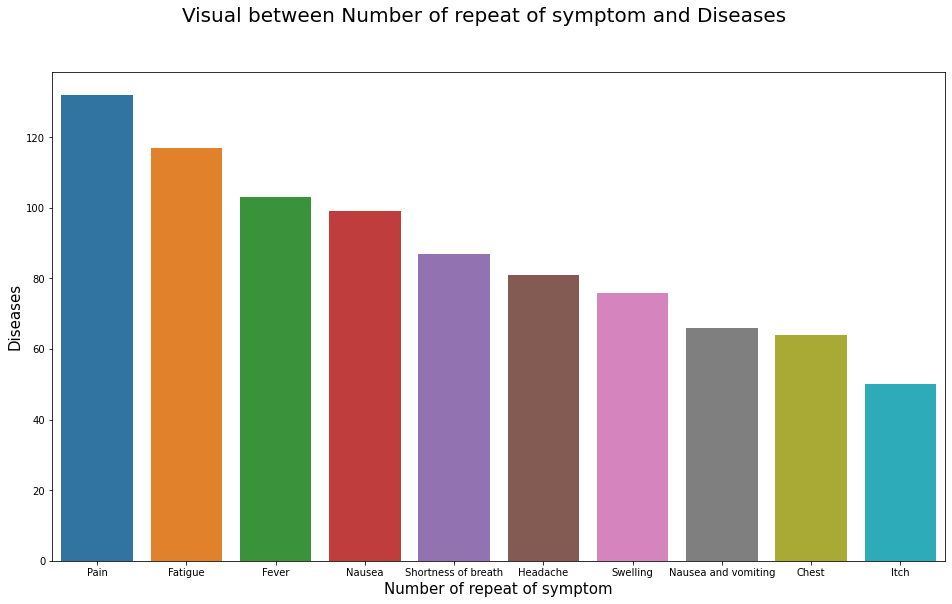

{'Pain': 132,
 'Fatigue': 117,
 'Fever': 103,
 'Nausea': 99,
 'Shortness of breath': 87,
 'Headache': 81,
 'Swelling': 76,
 'Nausea and vomiting': 66,
 'Chest': 64,
 'Itch': 50}

In [74]:
fig, ax =  plt.subplots(figsize =(16, 9)) 
dict_symptoms = dict(sorted(dict_symptoms_new.items(), key=lambda item: item[1],reverse=True))
dict_seaborn ={}
i = 0
for  symptom , number_value in dict_symptoms.items():
    dict_seaborn[symptom] =number_value
    i+=1
    if i ==10:
        break
seaborn.barplot(x=list(dict_seaborn.keys()),y=list(dict_seaborn.values()))
plt.xlabel('Number of repeat of symptom', fontsize=15)
plt.ylabel('Diseases', fontsize=15)
fig.suptitle('Visual between Number of repeat of symptom and Diseases', fontsize=20)
plt.show()
dict_seaborn

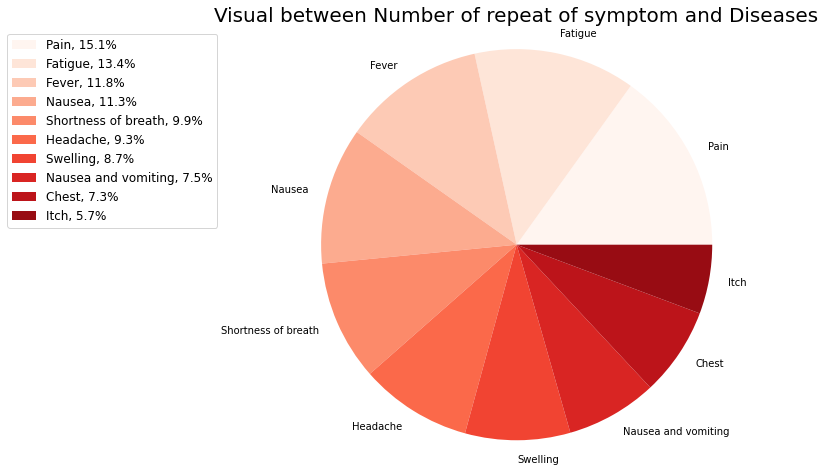

In [75]:
labels = dict_seaborn.keys()
sizes = dict_seaborn.values()

fig1, ax = plt.subplots(figsize=(11,6))
fig1.subplots_adjust(0.3,0,1,1)

theme = plt.get_cmap('Reds')
ax.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])
ax.pie(sizes, labels=labels)
ax.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 12},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
plt.title('Visual between Number of repeat of symptom and Diseases', fontsize=20)
plt.show()

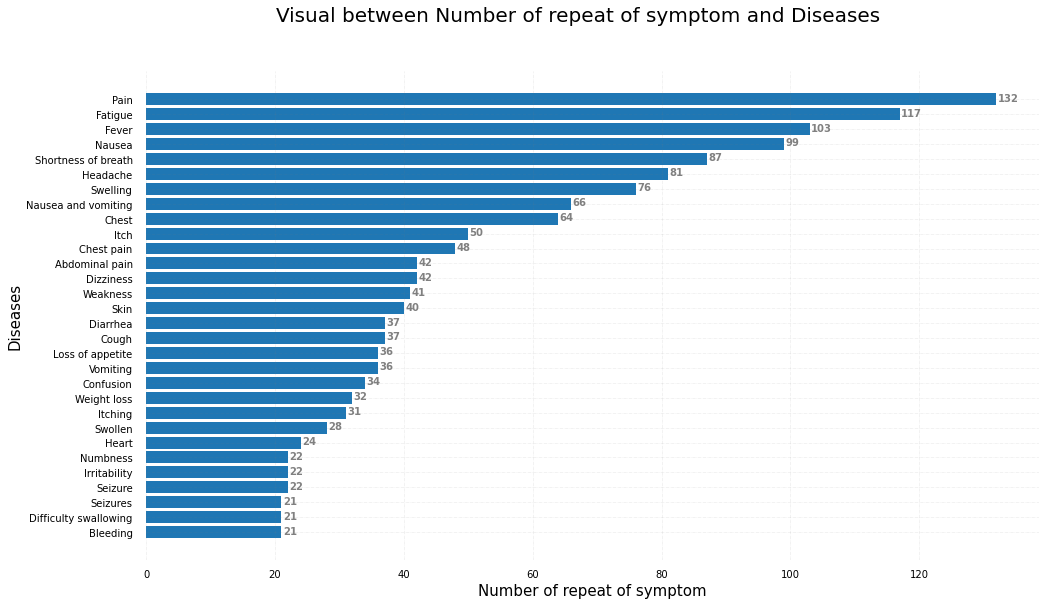

In [76]:
dict_seaborn ={}
i = 0
for  symptom , number_value in dict_symptoms.items():
    dict_seaborn[symptom] =number_value
    i+=1
    if i ==30:
        break

symptom = list(dict_seaborn.keys())
number_value = list(dict_seaborn.values())
  
fig, ax = plt.subplots(figsize =(16, 9)) 
ax.barh(symptom, number_value) 
  
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

ax.invert_yaxis() 
  
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
    
plt.xlabel('Number of repeat of symptom', fontsize=15)
plt.ylabel('Diseases', fontsize=15)
fig.suptitle('Visual between Number of repeat of symptom and Diseases', fontsize=20)
# Show Plot 
plt.show() 

- Answer: We note from the plot that these symptoms ('Pain': Where it comes with 132 a disease , 'Fatigue': Where it comes with 117 a disease, 'Fever': Where it comes with 103 a disease , 'Nausea' ,
 'Shortness of breath', 'Headache, 'Swelling',  etc ...) are the most common symptoms associated with the emergence of most diseases.

- What are the top 10 risk factors associated with most diseases?

### Visual between Number of repeat of Risk Factors and Diseases

In [77]:
list_risk_factors = []
for risk_factors in df_diseases_clean['Risk factors']:
    list_risk_factors = list_risk_factors + risk_factors.split("@$")

In [78]:
list_risk_factors = list(set(list_risk_factors))  #list of genre
dict_risk_factors = {}
for risk_factor in list_risk_factors:
    dict_risk_factors[risk_factor] = len(df_diseases_clean[df_diseases_clean['Risk factors'].str.contains(risk_factor)])

C:\Users\Fady\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [79]:
dict_risk_factor_new = {}
for  risk_factor , number_value in dict_risk_factors.items():
       if risk_factor != "" and risk_factor[-1] == '.' and risk_factor[:-1] in dict_risk_factor_new.keys():
           dict_risk_factor_new[risk_factor[:-1]] = dict_risk_factor_new[risk_factor[:-1]] + number_value
           print(risk_factor)
       elif risk_factor != "" and risk_factor[-1] == '.':
           dict_risk_factor_new[risk_factor[:-1]] = number_value
       elif risk_factor != "":
           dict_risk_factor_new[risk_factor] = number_value
print(len(dict_risk_factor_new))

Female sex.
3632


In [80]:
# to extract genre by using high revenue
high_repeat_value = max(dict_risk_factor_new.values())
high_repeat_risk_factor = ''
for risk_factor , number_value in dict_symptoms_new.items():
    if high_repeat_value == number_value:
        high_repeat_risk_factor = risk_factor
        break    
high_repeat_risk_factor , high_repeat_value

('', 145)

In [81]:
dict_risk_factor_new = dict(sorted(dict_risk_factor_new.items(), key=lambda item: item[1],reverse=True))

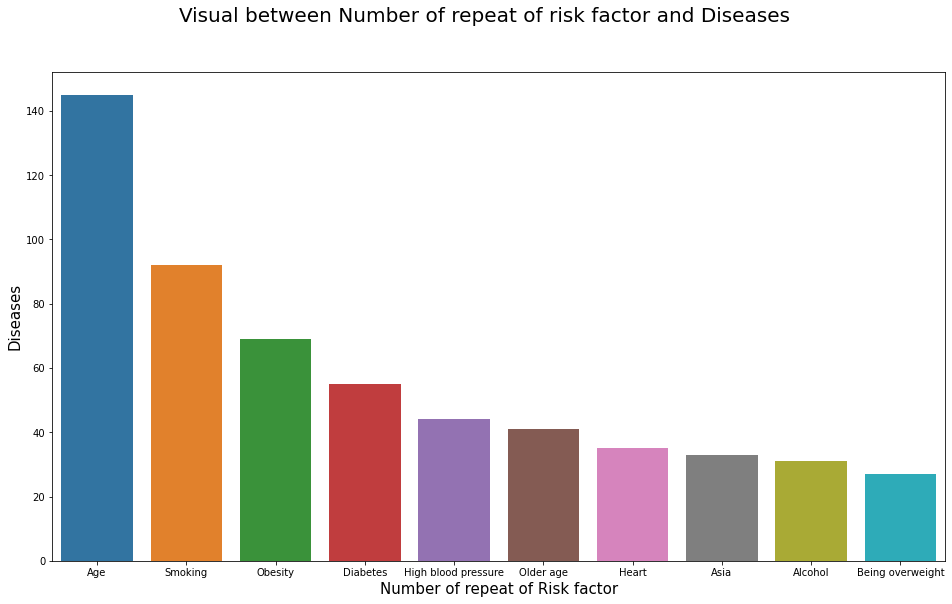

{'Age': 145,
 'Smoking': 92,
 'Obesity': 69,
 'Diabetes': 55,
 'High blood pressure': 44,
 'Older age': 41,
 'Heart': 35,
 'Asia': 33,
 'Alcohol': 31,
 'Being overweight': 27}

In [82]:
fig, ax =  plt.subplots(figsize =(16, 9)) 
dict_seaborn ={}
i = 0
for  risk_factor , number_value in dict_risk_factor_new.items():
    dict_seaborn[risk_factor] =number_value
    i+=1
    if i ==10:
        break
seaborn.barplot(x=list(dict_seaborn.keys()),y=list(dict_seaborn.values()))
plt.xlabel('Number of repeat of Risk factor', fontsize=15)
plt.ylabel('Diseases', fontsize=15)
fig.suptitle('Visual between Number of repeat of risk factor and Diseases', fontsize=20)
plt.show()
dict_seaborn

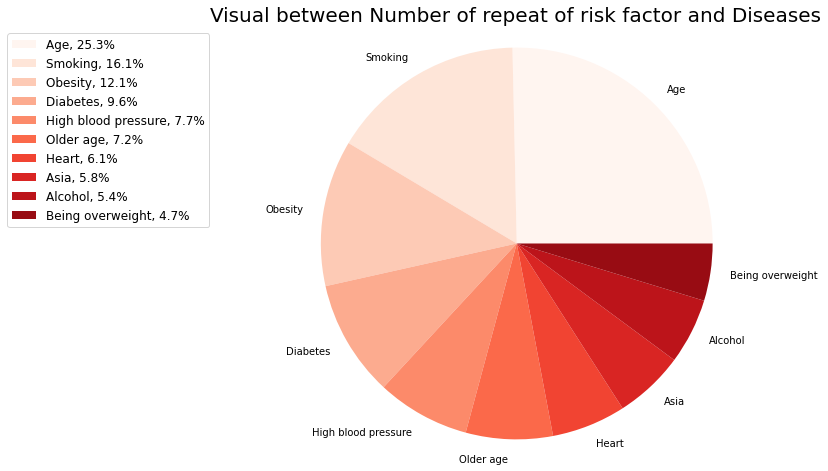

In [83]:
labels = dict_seaborn.keys()
sizes = dict_seaborn.values()

fig1, ax1 = plt.subplots(figsize=(11,6))
fig1.subplots_adjust(0.3,0,1,1)

theme = plt.get_cmap('Reds')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])
ax1.pie(sizes, labels=labels)
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 12},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
plt.title('Visual between Number of repeat of risk factor and Diseases', fontsize=20)
plt.show()

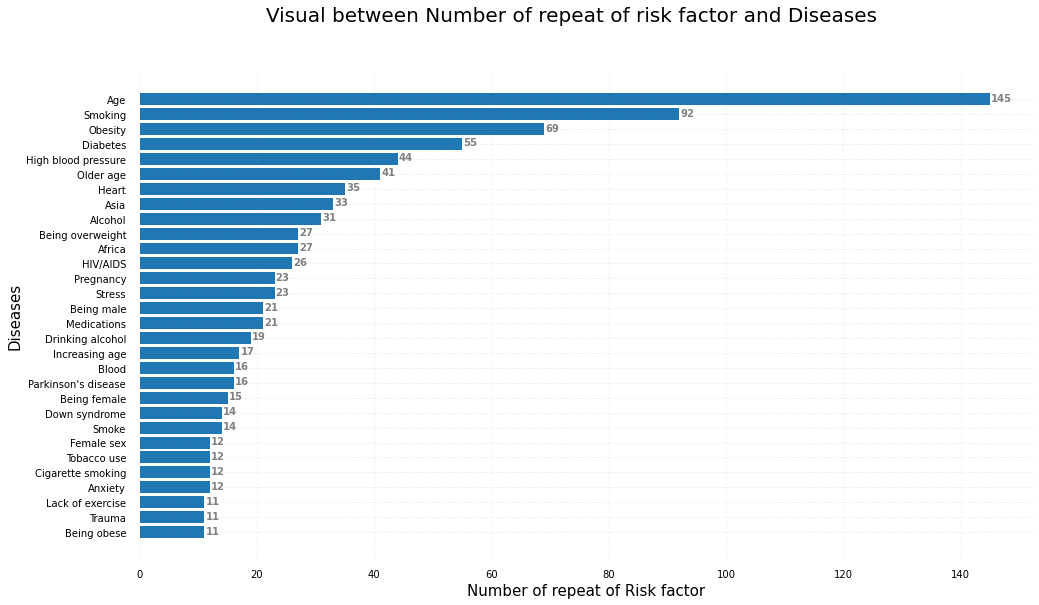

In [84]:
dict_seaborn ={}
i = 0
for  risk_factor , number_value in dict_risk_factor_new.items():
    dict_seaborn[risk_factor] =number_value
    i+=1
    if i ==30:
        break

risk_factor = list(dict_seaborn.keys())
number_value = list(dict_seaborn.values())
  
fig, ax = plt.subplots(figsize =(16, 9)) 
ax.barh(risk_factor, number_value) 
  
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

ax.invert_yaxis() 
  
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
    
plt.xlabel('Number of repeat of Risk factor', fontsize=15)
plt.ylabel('Diseases', fontsize=15)
fig.suptitle('Visual between Number of repeat of risk factor and Diseases', fontsize=20)
# Show Plot 
plt.show() 

- Answer: We note from the plot that these risk factors ('Age': Where it comes with 145 a disease, 'Smoking': Where it comes with 92 a disease, 'Obesity': Where it comes with 69 a disease, 'Diabetes': Where it comes with 55 a disease, 'High blood pressure': Where it comes with 44 a disease, 'Older age' ,  'Heart' ,  'Asia' , etc ... ) are the most common  risk factors associated with the emergence of most diseases.

<a id='conclusions'></a>
## Conclusions

> 

- Now, after completing the process of scraping a site (https://www.mayoclinic.org/) and  Create a database of diseases and data about them, and then we carried out a cleaning process for that data to become more efficient and accurate, and we were able to find out What are the top 10 symptoms that accompanies most diseases And It came in first place symptoms associated with most diseases are ( Pain ), and we were able to find out What are the top 10 risk factors that accompanies most diseases And It came in first place risk factors associated with most diseases are ( Age )  After all, the database is ready for use and extract information from it.
